In [123]:
import pandas as pd
%matplotlib inline
import re
import matplotlib.pyplot as plt

In [124]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

In [2]:
df = pd.read_csv('petfinderNY_database.csv')

In [5]:
df.head()

,additional_info,age,animal,breeds,description,id,lastUpdate,mixed,name,pet_size,...,sex,shelterID,zipcode,altered,vaccinated,housetrained,cynophobic,hates_children,felinephobic,specialNeeds
0,"['altered', 'hasShots', 'housetrained', 'noDog...",Adult,Cat,Tabby,Lincoln (#A1017544) was saved from the ACC's A...,30806905,2014-11-14T17:51:56Z,no,Lincoln,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Cynophobic,Definitely hates children,Not felinephobic,No special needs
1,"['altered', 'hasShots', 'housetrained']",Adult,Cat,Domestic Short Hair,ROOSIE (short for ROOSEVELT) is a nice easy-go...,32389630,2015-06-09T11:42:04Z,no,Roosie,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
2,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,Princess was a bottle baby rescued through ACC...,33623840,2015-10-26T21:06:00Z,no,Princess,Medium,...,Female,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
3,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,"MURRY!! Oh, we love this adolescent. Murry ...",34111054,2015-12-27T21:56:31Z,no,Murry,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
4,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,ADRIAN and ARABELLA (now called ARIE) are brot...,39463373,2017-09-23T05:21:02Z,no,ADRIAN & Arabella,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs


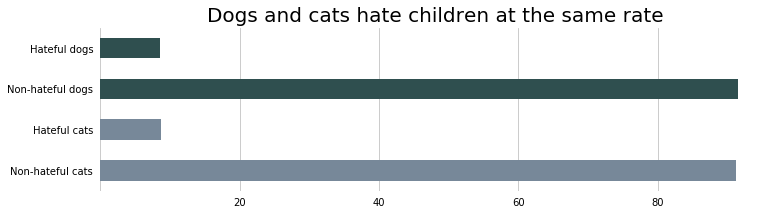

In [262]:
bar_colors = ['lightslategrey', 'lightslategrey', 'darkslategrey', 'darkslategrey']

ax = df.groupby('animal').hates_children.value_counts(normalize=True).plot(kind='barh', color=bar_colors, figsize=(12,3))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)

ax.set_xticklabels(['', '20', '40', '60', '80'])
ax.set_yticklabels(['Non-hateful cats', 'Hateful cats', 'Non-hateful dogs', 'Hateful dogs'])

ax.grid(b=True, axis='x')
ax.set_ylabel('')
ax.set_axisbelow(True)
ax.set_title('Dogs and cats hate children at the same rate', fontdict={'fontsize': 20,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}) 

plt.savefig("output1.pdf")

In [256]:
plt.savefig("output1.pdf")

<Figure size 432x288 with 0 Axes>

Text(0.5,1,'Dogs have greater size diversity')

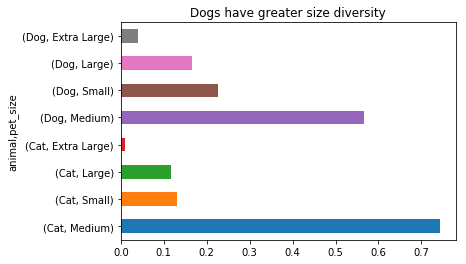

In [119]:
ax = df.groupby('animal').pet_size.value_counts(normalize=True).plot(kind='barh')

ax.set_title('Dogs have greater size diversity')

Text(0.5,1,"Cats can't hang with other cats almost as much as dogs can't hang with cats")

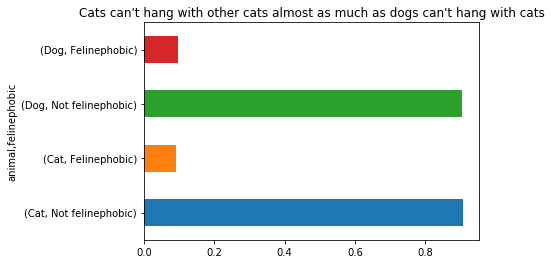

In [29]:
ax = df.groupby('animal').felinephobic.value_counts(normalize=True).plot(kind='barh')

ax.set_title('Cats can\'t hang with cats almost as much as dogs can\'t hang with cats')

Text(0.5,1,"Dogs can't hang with dogs almost as much as cats can't hang with dogs")

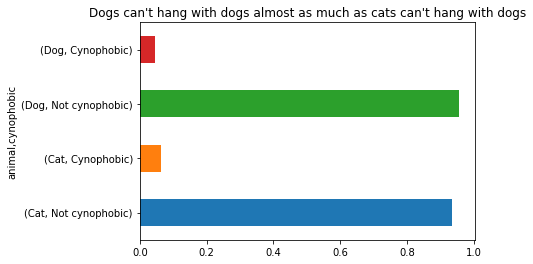

In [52]:
ax = df.groupby('animal').cynophobic.value_counts(normalize=True).plot(kind='barh')

ax.set_title('Dogs can\'t hang with dogs almost as much as cats can\'t hang with dogs')

Text(0.5,1,'The majority of adoptable cats are domestic short hairs')

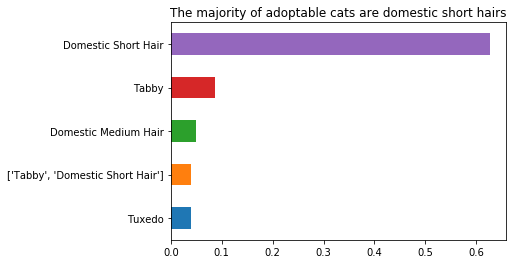

In [49]:
ax = df[df.animal == 'Cat'].breeds.value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind='barh')

ax.set_title('The majority of adoptable cats are domestic short hairs')

Text(0.5,1,'The majority of adoptable dogs are pit bull terriers')

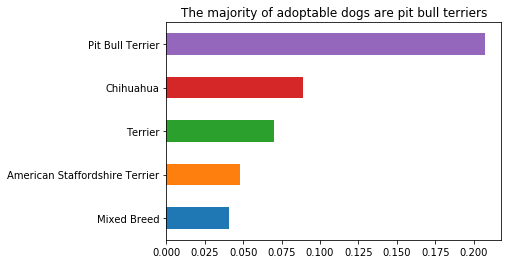

In [50]:
ax = df[df.animal == 'Dog'].breeds.value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind='barh')

ax.set_title('The majority of adoptable dogs are pit bull terriers')

Text(0.5,1,'More cats have special needs than dogs')

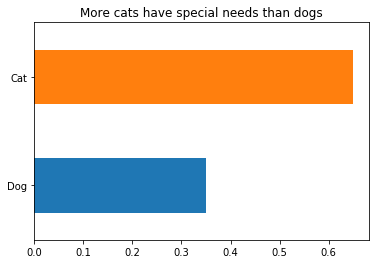

In [56]:
ax = df[df['specialNeeds'] == 'Has special needs'].animal.value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind='barh')

ax.set_title('More cats have special needs than dogs')

Text(0.5,1,"If you adopt, you're more likely to get rabies from a cat than a dog")

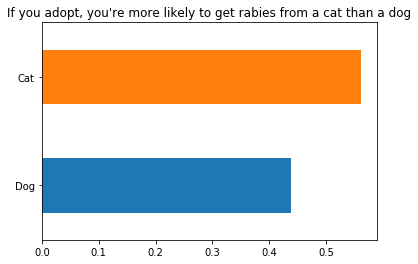

In [120]:
ax = df[df['vaccinated'] == 'Not vaccinated'].animal.value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind='barh')

ax.set_title('If you adopt, you\'re more likely to get rabies from a cat than a dog')

In [99]:
dogs_who_hate = df[df.animal == 'Dog'].hates_children.value_counts(normalize=True)

In [100]:
pit_bulls_who_hate = df[df.breeds.str.contains('Pit bull', case=False)].hates_children.value_counts(normalize=True)

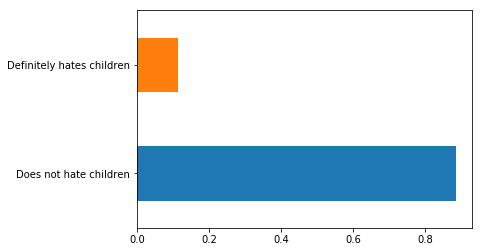

In [113]:
pit_bulls_who_hate.plot(kind='barh')

Text(0.5,1,'Percentage of animals described as nice, pleasant, or loving')

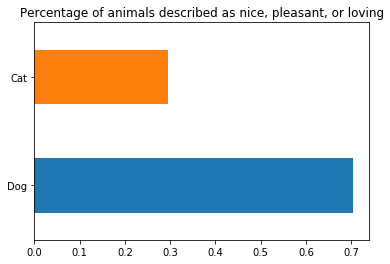

In [129]:
ax = df[df.description.str.contains('nice|pleasant|loving')].animal.value_counts(normalize=True).plot(kind='barh')

ax.set_title('Percentage of animals described as nice, pleasant, or loving')

In [169]:
ax.set_title?

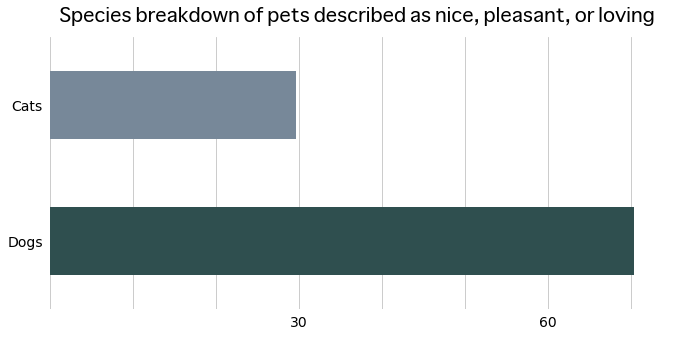

In [265]:
bar_colors = ['darkslategrey','lightslategrey']

ax = df[df.description.str.contains('nice|pleasant|loving')].animal.value_counts(normalize=True).plot(kind='barh', color=bar_colors, figsize=(11,5))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)
ax.title.set_fontname('Sathu')
ax.set_xticklabels(labels=['', '', '', '30', '', '', '60'], fontdict={'fontsize': 14})
ax.set_yticklabels(['Dogs', 'Cats'], fontdict={'fontsize': 14})
ax.set_axisbelow(True)
ax.grid(b=True, axis='x')
ax.set_ylabel('')


ax.set_title('Species breakdown of pets described as nice, pleasant, or loving', fontdict={'fontsize': 20,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=15)

plt.savefig("output2.pdf")

In [191]:
ax.set_yticklabels?

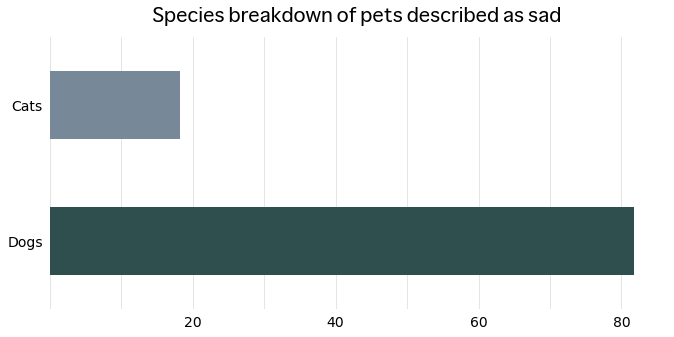

In [266]:
bar_colors = ['darkslategrey','lightslategrey']

ax = df[df.description.str.contains('sad')].animal.value_counts(normalize=True).plot(kind='barh', color=bar_colors, figsize=(11,5))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)
ax.set_axisbelow(True)
ax.set_xticklabels(labels=['', '', '20', '', '40', '', '60', '', '80'], fontdict={'fontsize': 14})
ax.set_yticklabels(['Dogs', 'Cats'], fontdict={'fontsize': 14})
ax.title.set_fontname('Sathu')
ax.grid(b=True, axis='x', alpha=.4)
ax.set_ylabel('')

ax.set_title('Species breakdown of pets described as sad', fontdict={'fontsize': 20,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=15)

plt.savefig("output3.pdf")

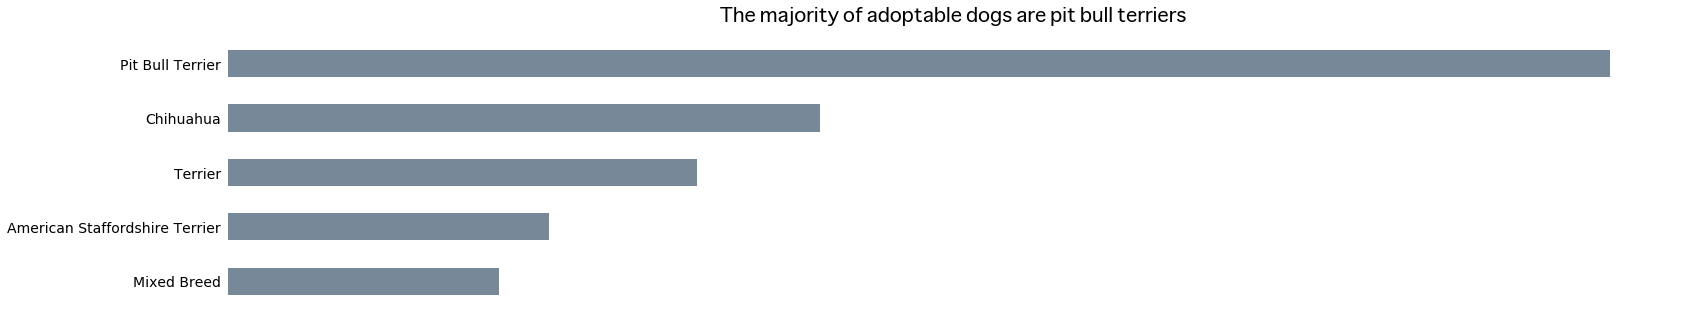

In [271]:
bar_colors = ['lightslategrey','lightslategrey' ,'lightslategrey' ,'lightslategrey' ,'lightslategrey']

ax = df[df.animal == 'Dog'].breeds.value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind='barh', color=bar_colors, figsize=(26, 5))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)
ax.set_axisbelow(True)
ax.set_yticklabels(labels=['Mixed Breed', 'American Staffordshire Terrier', 'Terrier', 'Chihuahua', 'Pit Bull Terrier'], fontdict={'fontsize': 14})
ax.set_xticklabels('')
ax.title.set_fontname('Sathu')
ax.grid(b=False, axis='x', alpha=.0)
ax.set_ylabel('')

ax.set_title('The majority of adoptable dogs are pit bull terriers', fontdict={'fontsize': 20,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=15)

plt.savefig("output4.pdf")

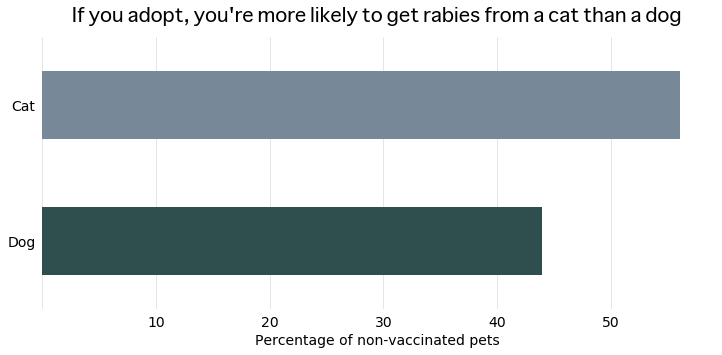

In [292]:
bar_colors = ['darkslategrey','lightslategrey']

ax = df[df['vaccinated'] == 'Not vaccinated'].animal.value_counts(normalize=True).head(5).sort_values(ascending=True).plot(kind='barh', figsize=(12,5), color=bar_colors)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.8)
ax.set_axisbelow(True)
ax.set_yticklabels(labels=['Dog', 'Cat'], fontdict={'fontsize': 14})
ax.set_xticklabels(labels=['', '10', '20', '30', '40', '50'], fontdict={'fontsize': 14})
ax.title.set_fontname('Sathu')
ax.grid(b=True, axis='x', alpha=.4)
ax.set_xlabel('Percentage of non-vaccinated pets', fontdict={'fontsize': 14})

ax.set_title('If you adopt, you\'re more likely to get rabies from a cat than a dog', fontdict={'fontsize': 20,
        'fontweight' : 1,
        'verticalalignment': 'baseline'}, pad=15)

plt.savefig("output5.pdf")